<a href="https://colab.research.google.com/github/rodrigotorresp/Practica-Regresi-n-ML/blob/main/Practica1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import pandas as pd
train_dataframe= pd.read_csv("https://raw.githubusercontent.com/rodrigotorresp/Practica-Regresi-n-ML/main/train.csv");
train_dataframe

,LaptopId,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,981,Toshiba,Portege Z30-C-1CV,Notebook,13.3,Full HD 1920x1080,Intel Core i5 6200U 2.3GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 7,1.2kg,1195.00
1,996,HP,Spectre 13-V111dx,Ultrabook,13.3,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 7500U 2.7GHz,8GB,256GB SSD,Intel HD Graphics 620,Windows 10,1.11kg,1349.00
2,77,Dell,Inspiron 5570,Notebook,15.6,Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,8GB,128GB SSD + 1TB HDD,Intel UHD Graphics 620,Windows 10,2.02kg,855.00
3,103,HP,Envy 13-ad009n,Ultrabook,13.3,IPS Panel Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8GB,256GB SSD,Nvidia GeForce MX150,Windows 10,1.38kg,1119.00
4,946,Dell,Latitude 7280,Ultrabook,12.5,Full HD / Touchscreen 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics,Windows 10,1.36kg,1472.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...
907,994,Dell,Inspiron 5378,2 in 1 Convertible,13.3,Full HD / Touchscreen 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,Windows 10,1.68kg,889.00
908,615,Asus,FX753VD-GC007T (i7-7700HQ/8GB/1TB,Gaming,17.3,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,8GB,128GB SSD + 1TB HDD,Nvidia GeForce GTX 1050,Windows 10,3kg,1168.00
909,1063,Dell,Inspiron 5567,Notebook,15.6,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,16GB,2TB HDD,AMD Radeon R7 M445,Windows 10,2.32kg,989.99
910,96,Dell,Inspiron 3567,Notebook,15.6,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8GB,1TB HDD,AMD Radeon R5 M430,Linux,2.2kg,599.90


Importamos el fichero de datos

In [21]:
import sklearn.compose

colum_transformer = sklearn.compose.ColumnTransformer(transformers=[
    ("Laptop Id" , "drop", [0]),
    ("Company" , sklearn.preprocessing.OrdinalEncoder(), [1]),
    ("Product" , "drop", [2]),
    ("TypeName" , sklearn.preprocessing.OrdinalEncoder(), [3]),
    ("Inches" , "passthrough", [4]),
    ("ScreenResolution" , sklearn.preprocessing.OrdinalEncoder(), [5]),
    ("CPU" , sklearn.preprocessing.OrdinalEncoder(), [6]),
    ("RAM" , sklearn.preprocessing.OrdinalEncoder(), [7]),
    ("Memory" , sklearn.preprocessing.OrdinalEncoder(), [8]),
    ("GPU" , sklearn.preprocessing.OrdinalEncoder(), [9]),
    ("OPSYS" , sklearn.preprocessing.OrdinalEncoder(), [10]),
    ("Weight" , sklearn.preprocessing.OrdinalEncoder(), [11]),
    ("Price" , "drop", [12])

    ]);
  

In [23]:
train_dataframe_transform=colum_transformer.fit_transform(train_dataframe)
train_dataframe_transform

array([[ 16. ,   3. ,  13.3, ...,  38. ,   7. ,  28. ],
       [  7. ,   4. ,  13.3, ...,  43. ,   5. ,  10. ],
       [  4. ,   3. ,  15.6, ...,  50. ,   5. ,  83. ],
       ...,
       [  4. ,   3. ,  15.6, ...,  21. ,   5. , 107. ],
       [  4. ,   3. ,  15.6, ...,  17. ,   2. , 105. ],
       [ 10. ,   3. ,  14. , ...,  59. ,   5. ,  70. ]])

In [24]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

X = train_dataframe_transform.data
y = train_dataframe.Price

reg = LinearRegression().fit(X, y)
reg.intercept_

-1427.0913015556564

In [25]:

reg.coef_


array([ 10.55111726,   3.26582692,  70.98732596,  17.59206966,
         9.46625382, -67.12712948,  11.99488688,   9.16639857,
       116.64062585,  -2.64588047])

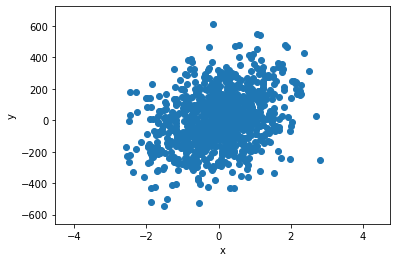

In [26]:
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
import numpy as np

X, y = make_regression(n_samples=913, n_features=13, n_informative=11, n_targets=1)

plt.figure()

min_x = np.min(X)
max_x = np.max(X)
diff_x = max_x - min_x

min_y = np.min(y)
max_y = np.max(y)
diff_y = max_y - min_y

plt.xlim(min_x - 0.1 * diff_x, max_x + 0.1 * diff_x)
plt.ylim(min_y - 0.1 * diff_y, max_y + 0.1 * diff_y)

plt.xlabel('x')
plt.ylabel('y')

plt.scatter(X[:,0], y)

In [27]:
n,m = X.shape
x0 = np.ones((n,1))
stack = np.hstack((x0, X))

# beta = ((X^t * X)^-1 * X^t) * y
beta = np.dot(np.dot(np.linalg.inv(np.dot(np.transpose(stack), stack)), np.transpose(stack)), y)
beta

array([ 1.72084569e-15,  6.52205997e+01,  8.99026115e+01,  1.54220908e+01,
       -6.10622664e-15,  2.61086725e-15,  9.14476247e+01,  2.57906502e+01,
        5.70574200e+00,  9.41195411e+01,  2.43899810e+01,  5.71965951e+01,
        1.51835268e+01,  1.56553583e+01])

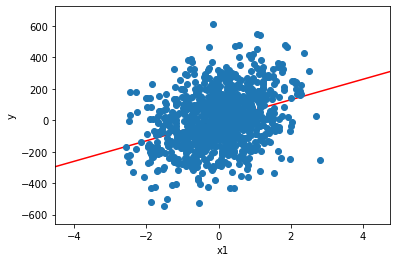

In [28]:
plt.figure()

min_x = np.min(X)
max_x = np.max(X)
diff_x = max_x - min_x

min_y = np.min(y)
max_y = np.max(y)
diff_y = max_y - min_y

plt.xlim(min_x - 0.1 * diff_x, max_x + 0.1 * diff_x)
plt.ylim(min_y - 0.1 * diff_y, max_y + 0.1 * diff_y)

plt.xlabel('x1')
plt.ylabel('y')

plt.scatter(X[:,0], y, zorder=10)

line = np.linspace(min_x - 0.1 * diff_x, max_x + 0.1 * diff_x)
plt.plot(line, beta[0] + beta[1] * line, c='red')


In [29]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error
ridge = Ridge(alpha=1.0).fit(X, y)

y_pred = ridge.predict(X)

print("MAE: ", mean_absolute_error(y, y_pred))
print("MSE: ", mean_squared_error(y, y_pred))
print("R2: ", ridge.score(X, y))

MAE:  0.17265946146357095
MSE:  0.045857492257222
R2:  0.9999985982263175
